#<center> **SigefScraper: obtendo informações de imóveis certificados no Sigef com Python**</center>


**Objetivo**: A partir de uma relação de códigos de parcelas de imóveis certificados no Sigef (Sistema de Gestão Fundiária do Incra), saber quem são seus detentores.

**Problema**: Tenho a planilha de atributos de imóveis certificados do Sigef, mas ela não tem a identificação dos donos detentores do imóvel.

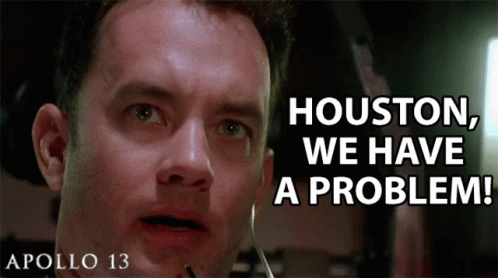

# **Transformando o problema em problemas menores**

## **Problema 1: não tenho os links com os detalhes das parcelas😢** 

O arquivo que eu tenho é shapefile, mas a tabela de atributos, em dbf, pode ser lida no LibreOffice. Abrindo o dbf, podem ser vistas informações como o nome do imóvel, código da parcela, status do registro. 
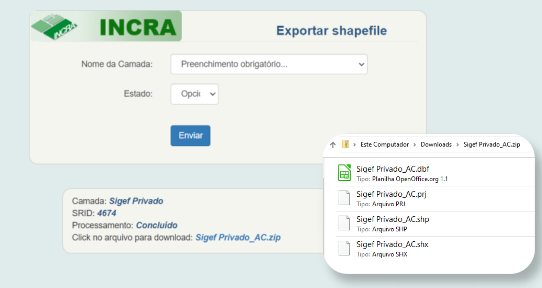


As páginas do Sigef têm um padrão:

**`https://sigef.incra.gov.br/geo/parcela/detalhe/ + co_parcela`**: link para os detalhes da parcela


### <center>**Problema 1 → Solução: concatenar strings!**</center>

In [3]:
import pandas as pd
df=pd.read_csv("parcelas.csv", sep=";")
df

,parcela_co,situacao_i,codigo_imo,data_submi,data_aprov,status,nome_area,municipio_,uf_id
0,e66291c1-c857-4858-8447-9b7be926ba0d,TITULADANAOREGISTRADA,"1,00E+13",11/06/2018,11/06/2018,CERTIFICADA,FAZENDA SANTO ANTONIO,3509205,35
1,c7fee801-6369-40ec-875a-026d308de988,TITULADANAOREGISTRADA,"9,51E+12",20/08/2018,20/08/2018,CERTIFICADA,FAZENDA GUATURINHO,3509205,35
2,96eeb83f-23be-4d77-8622-d79d142f64d7,TITULADANAOREGISTRADA,"9,51E+12",15/08/2018,20/08/2018,CERTIFICADA,G.1 FAZENDA JUQUERI-GUASSU,3509205,35
3,0d6f20ed-1de5-4791-b42b-6c138eba9c59,TITULADANAOREGISTRADA,"6,38E+12",20/05/2019,20/05/2019,CERTIFICADA,CHÁCARA TUIUTÍ,3509205,35
4,08d99736-e2d2-4ba8-a45b-980d88404603,TITULADANAOREGISTRADA,"6,38E+12",30/09/2019,30/09/2019,CERTIFICADA,SÍTIO SÃO PEDRO,3509205,35
5,96f35aaf-925f-4dd8-a796-4ff9063a1d78,TITULADANAOREGISTRADA,"6,38E+12",30/09/2019,30/09/2019,CERTIFICADA,SÍTIO SÃO PEDRO,3509205,35
6,fd41ce5d-8051-44e8-bb93-6ff9a7ab2791,TITULADANAOREGISTRADA,"6,38E+12",15/03/2016,15/03/2016,CERTIFICADA,SITIO CAJAMAR,3509205,35
7,1d52df86-b925-4662-ad1f-2087262cba1c,TITULADANAOREGISTRADA,"9,50E+12",29/03/2016,29/03/2016,CERTIFICADA,SÍTIO DO ZÉ,3509205,35
8,49651f48-7f6f-417d-bcc3-fb0c08451967,TITULADANAOREGISTRADA,"6,38E+12",20/03/2017,20/03/2017,CERTIFICADA,SITIO ROSEIRAL,3509205,35


In [4]:
# Criando uma coluna com o nome link que vai abrigar o link do detalhe da parcela
df['link'] = 'https://sigef.incra.gov.br/geo/parcela/detalhe/' + df['parcela_co']
df

,parcela_co,situacao_i,codigo_imo,data_submi,data_aprov,status,nome_area,municipio_,uf_id,link
0,e66291c1-c857-4858-8447-9b7be926ba0d,TITULADANAOREGISTRADA,"1,00E+13",11/06/2018,11/06/2018,CERTIFICADA,FAZENDA SANTO ANTONIO,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
1,c7fee801-6369-40ec-875a-026d308de988,TITULADANAOREGISTRADA,"9,51E+12",20/08/2018,20/08/2018,CERTIFICADA,FAZENDA GUATURINHO,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
2,96eeb83f-23be-4d77-8622-d79d142f64d7,TITULADANAOREGISTRADA,"9,51E+12",15/08/2018,20/08/2018,CERTIFICADA,G.1 FAZENDA JUQUERI-GUASSU,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
3,0d6f20ed-1de5-4791-b42b-6c138eba9c59,TITULADANAOREGISTRADA,"6,38E+12",20/05/2019,20/05/2019,CERTIFICADA,CHÁCARA TUIUTÍ,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
4,08d99736-e2d2-4ba8-a45b-980d88404603,TITULADANAOREGISTRADA,"6,38E+12",30/09/2019,30/09/2019,CERTIFICADA,SÍTIO SÃO PEDRO,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
5,96f35aaf-925f-4dd8-a796-4ff9063a1d78,TITULADANAOREGISTRADA,"6,38E+12",30/09/2019,30/09/2019,CERTIFICADA,SÍTIO SÃO PEDRO,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
6,fd41ce5d-8051-44e8-bb93-6ff9a7ab2791,TITULADANAOREGISTRADA,"6,38E+12",15/03/2016,15/03/2016,CERTIFICADA,SITIO CAJAMAR,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
7,1d52df86-b925-4662-ad1f-2087262cba1c,TITULADANAOREGISTRADA,"9,50E+12",29/03/2016,29/03/2016,CERTIFICADA,SÍTIO DO ZÉ,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...
8,49651f48-7f6f-417d-bcc3-fb0c08451967,TITULADANAOREGISTRADA,"6,38E+12",20/03/2017,20/03/2017,CERTIFICADA,SITIO ROSEIRAL,3509205,35,https://sigef.incra.gov.br/geo/parcela/detalhe...


In [5]:
# Olhando os links
for i in df['link']:
  print(i)

https://sigef.incra.gov.br/geo/parcela/detalhe/e66291c1-c857-4858-8447-9b7be926ba0d
https://sigef.incra.gov.br/geo/parcela/detalhe/c7fee801-6369-40ec-875a-026d308de988
https://sigef.incra.gov.br/geo/parcela/detalhe/96eeb83f-23be-4d77-8622-d79d142f64d7
https://sigef.incra.gov.br/geo/parcela/detalhe/0d6f20ed-1de5-4791-b42b-6c138eba9c59
https://sigef.incra.gov.br/geo/parcela/detalhe/08d99736-e2d2-4ba8-a45b-980d88404603
https://sigef.incra.gov.br/geo/parcela/detalhe/96f35aaf-925f-4dd8-a796-4ff9063a1d78
https://sigef.incra.gov.br/geo/parcela/detalhe/fd41ce5d-8051-44e8-bb93-6ff9a7ab2791
https://sigef.incra.gov.br/geo/parcela/detalhe/1d52df86-b925-4662-ad1f-2087262cba1c
https://sigef.incra.gov.br/geo/parcela/detalhe/49651f48-7f6f-417d-bcc3-fb0c08451967


In [6]:
url_parcela = 'https://sigef.incra.gov.br/geo/parcela/detalhe/49651f48-7f6f-417d-bcc3-fb0c08451967'

In [7]:
#importando as bibliotecas necessárias
import csv #para abrir o arquivo csv
from urllib.request import urlopen #para lidar com os links
resposta = urlopen(i)
html = resposta.read().decode("utf-8")

URLError: ignored

## **Problema 2: E como eu faço para acessar os links?** 😢



**Solução**: chama o Bernardo!
O problema não está no código, mas no certificado do site. Há uma forma de lidar com isso, mas:
> "*fazer isso é aceitar que a criptografia do site tem problemas e que os dados podem ser interceptados... (...) se fosse algum projeto com informações sensíveis, seria melhor tomar cuidado*" - Bernardo Vianna



In [ ]:
import ssl #para lidar com o certificado de segurança
ssl._create_default_https_context = ssl._create_unverified_context

## **Problema 3: Mas eu não quero abrir um link, quero ver VÁRIOS** 😫 



In [ ]:
for i in list(df['link']):
  resposta = urlopen(i)
  html = resposta.read().decode("utf-8")
  partes = html.split("CPF/CNPJ</th>\n        </tr>\n        </thead>\n        <tbody>\n\n        \n\n            <tr>\n                <td>")
  for parte in partes:
    subparte = parte.split("</td>\n")
    nome = subparte[0]
    documento = subparte[1]
  print(nome)
  print(documento)

**Próximos passos:**
*   Adicionar `nome` e `documento` no dataframe `df` (e salvar, para documentar o processo)
*   Limpar a string `documento`
*   Automatizar a interseção de camadas do QGIS *(é possível ler os atributos dos shapefiles com Python?)* 🤔
*   Coletar outras informações (responsável técnico, baixar documentos...)

**Sabe como me ajudar? Faça um pull request :)**